# Regresion lineal-Teoria.

In [1]:
%load_ext watermark
%watermark

2018-12-30T12:53:59-06:00

CPython 3.6.7
IPython 7.2.0

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(15,15)
plt.rcParams["font.size"]=20

In [4]:
vehiculos=pd.read_csv("data/vehiculos_procesado.csv",usecols=["consumo","co2","cilindros","desplazamiento"])
litros_por_galon=3.78541
vehiculos["consumo_litros_milla"]=litros_por_galon/vehiculos.consumo

In [5]:
vehiculos.shape

(35539, 5)

In [6]:
vehiculos.head()

,desplazamiento,cilindros,consumo,co2,consumo_litros_milla
0,2.5,4.0,17,522.764706,0.222671
1,4.2,6.0,13,683.615385,0.291185
2,2.5,4.0,16,555.437500,0.236588
3,4.2,6.0,13,683.615385,0.291185
4,3.8,6.0,16,555.437500,0.236588


El modelo de regresion lineal mediante OLS(ordinary least squares) tiene la forma:
    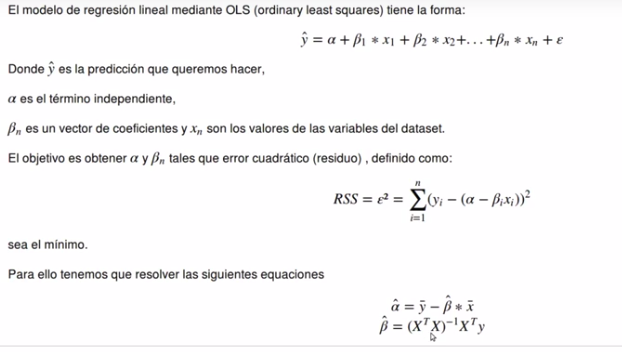

Para obtener los coeficientes del modelo dedicamos una fraccion del dataset a entrenar y otra a evaluar los resultados(para evitar un sobreajuste o sobregeneracion).

In [7]:
#Definimos un 80% del dataset para entrenamiento
pct_entrenamiento=0.8

In [8]:
#DataSet de entrenamiento con el 80% 
vehiculos_training=vehiculos.sample(frac=pct_entrenamiento)
#DataSet de Test filtramos los vehiculos que no estan en el set de entrenamiento por su indice(nota: el simbolo ~ es negacion en pandas)
vehiculos_test=vehiculos[~vehiculos.index.isin(vehiculos_training.index)]
print(vehiculos_training.shape)
print(vehiculos_test.shape)

(28431, 5)
(7108, 5)


In [9]:
variables_independientes=["desplazamiento","cilindros","consumo_litros_milla"]
variable_dependiente="co2"

In [10]:
#Pasamos los valores de las variables independietes de entrenamiento a una matriz
X=vehiculos_training[variables_independientes].values
#Pasamos los valores de la variable dependien de entrenamiento a una matriz
y=vehiculos_training[variable_dependiente].values
#Obtenemos la transpuesta de X
X_T=X.T

.values equivale a usar .as_matrix()

In [11]:
X

array([[5.4       , 8.        , 0.29118538],
       [6.        , 8.        , 0.31545083],
       [3.8       , 6.        , 0.1892705 ],
       ...,
       [2.5       , 4.        , 0.18025762],
       [2.2       , 4.        , 0.15772542],
       [2.4       , 5.        , 0.17206409]])

In [12]:
X.shape

(28431, 3)

In [13]:
y

array([683.61538462, 714.        , 444.35      , ..., 423.19047619,
       424.16666667, 403.95454545])

Calculamos las betas

In [14]:
betas=np.linalg.inv(X_T@X)@X_T@y
betas

array([ 3.48728465e+00, -4.50489450e-01,  2.30610590e+03])

Calculamos la media de la y

In [15]:
y.mean()

470.83026839545437

Calulamos alpha

Vector de los promedios de las variables independientes de las variables de entrenamiento

In [16]:
vector_X_promedios=vehiculos_training[variables_independientes].mean().values
vector_X_promedios

array([3.31148394, 5.73212339, 0.20012285])

np.dot es una funcion para el producto matricial de betas por vector_X_promedios equivalente a  betas@vector_X_promedios

In [17]:
alpha=y.mean()-np.dot(betas,vector_X_promedios)
alpha

0.3599638562204177

Funcion de prediccion

In [18]:
def predecir(r):
    return alpha+np.dot(betas,r.values)

In [19]:
vehiculos_training[variables_independientes].values

array([[5.4       , 8.        , 0.29118538],
       [6.        , 8.        , 0.31545083],
       [3.8       , 6.        , 0.1892705 ],
       ...,
       [2.5       , 4.        , 0.18025762],
       [2.2       , 4.        , 0.15772542],
       [2.4       , 5.        , 0.17206409]])

In [20]:
vehiculos_training["co2_pred"]=vehiculos_training[variables_independientes].apply(predecir,axis=1)
vehiculos_test["co2_pred"]=vehiculos_test[variables_independientes].apply(predecir,axis=1)

/home/jose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
vehiculos_training[["co2","co2_pred"]].head()

,co2,co2_pred
29133,683.615385,687.091718
15299,714.000000,745.142783
28453,444.350000,447.386525
23973,634.785714,639.417535
13071,467.736842,467.569214


## Presentar la formula del modelo

In [22]:
model_formula = "y ~ {alpha:.3f} + {beta_1:.2f}*desplazamiento + {beta_2:.2f}*cilindros + {beta_3:.3f}*consumo_litros_milla".format(
    alpha=alpha, beta_1=betas[0], beta_2=betas[1], beta_3=betas[2])
model_formula

'y ~ 0.360 + 3.49*desplazamiento + -0.45*cilindros + 2306.106*consumo_litros_milla'

Graficamos modelo vs valores

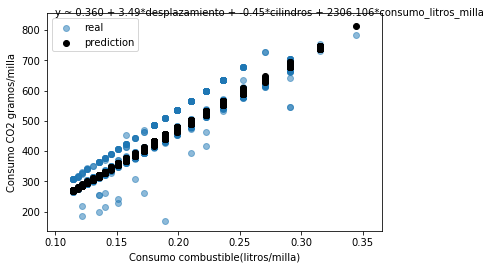

In [23]:
plt.scatter(vehiculos_test.consumo_litros_milla,vehiculos_test.co2,alpha=0.5,label="real")
plt.text(0.1,850,model_formula)
plt.scatter(vehiculos_test.consumo_litros_milla,vehiculos_test.co2_pred,c="black",label="prediction")
plt.xlabel("Consumo combustible(litros/milla)")
plt.ylabel("Consumo CO2 gramos/milla")
plt.legend();

In [24]:
def error_cuatratico_medio(y,y_pred):
    return np.sum((y-y_pred)**2)/len(y)

In [25]:
error_traning=error_cuatratico_medio(vehiculos_training.co2,vehiculos_training.co2_pred)
error_traning

128.77649627907405

In [26]:
error_test=error_cuatratico_medio(vehiculos_test.co2,vehiculos_test.co2_pred)
error_test

141.50369279399305